# Module Assessment

### Setup

Import required packages for effective operation of notebook

In [1]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Saving plots
import matplotlib.pyplot as plt

# IPython


### Assessment Tasks

1. Write a function titled get_data() to download previous 5 days for the FAANG stocks
2. Plot the data for each stock
3. Write faang.py script to perform task 1 and 2
4. Create GitHub Actions workflow to run script faang.yml every Saturday morninng

#### Problem 1. Funtion Creation

To create the 'get_data' function, '''yf.download''' will be used, with certain parameters specified, to align with the 5 day look back.

In [2]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head(5)

/tmp/ipykernel_1664/74887220.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-06 14:30:00+00:00  272.820007  247.159500  285.209991  625.059998   
2025-11-06 15:30:00+00:00  272.181488  243.660004  284.190704  622.159973   
2025-11-06 16:30:00+00:00  271.424988  243.940002  285.494995  624.390015   
2025-11-06 17:30:00+00:00  271.350006  244.110001  285.940002  623.440002   
2025-11-06 18:30:00+00:00  271.990112  245.409897  287.569611  624.755005   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-06 14:30:00+00:00  1093.063965  272.820007  250.380005  288.809998   
2025-11-06 15:30:00+00:00  1100.829956  273.399994  247.289993  285.339996   
2025-11-06 16:30:00+00:00  1102.180054  272.220001  244.074997  285.534210   
2025-11-06 17:30:00+00:00  1094.099976  272.565002  244.740005  286.929993   
2025-11-06 18:30:00+00:00  1090.295044  272.160004  245.509995  287.799988   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-06 14:30:00+00:00  635.849976  1099.005005  ...  267.890015   
2025-11-06 15:30:00+00:00  625.210022  1103.209961  ...  272.828003   
2025-11-06 16:30:00+00:00  624.629883  1103.699951  ...  272.179993   
2025-11-06 17:30:00+00:00  626.000000  1103.069946  ...  271.420013   
2025-11-06 18:30:00+00:00  625.789978  1094.530029  ...  271.369995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-06 14:30:00+00:00  249.220001  285.734985  635.750000  1095.140015   
2025-11-06 15:30:00+00:00  247.199997  285.230011  625.210022  1093.395020   
2025-11-06 16:30:00+00:00  243.649994  284.259613  622.256409  1100.839966   
2025-11-06 17:30:00+00:00  243.960007  285.450012  624.340027  1102.079956   
2025-11-06 18:30:00+00:00  244.100006  285.929993  623.409973  1094.170044   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-11-06 14:30:00+00:00  6762187  7131629  4960015  4539909  499328  
2025-11-06 15:30:00+00:00  5580072  4884480  1908302  2536887  370479  
2025-11-06 16:30:00+00:00  3198033  3243623  1589151  1585014  266958  
2025-11-06 17:30:00+00:00  2621839  2169963  1137746  1306807  186616  
2025-11-06 18:30:00+00:00  1783486  2267194  1058616  1121435  290539  

[5 rows x 25 columns]

Given the above code can be seen to pull the requested dates; previous 5 days with 1 hour intervals, the following code can then be used to save the information with the required naming convention.

In [3]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes

now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 11, 12, 18, 40, 49, 411138)

This now needs to be converted into a string, and can be done so using '''now.strftime'''
https://www.w3schools.com/python/python_datetime.asp

In [4]:
# Convert date and time into string specifying:
# %Y - for year
# %m - for month

now.strftime('%Y%m%d-%H%M%S')

'20251112-184049'

Merging the above 2 codes will generate the exact time the code is ran, and capture it in a string format. 

In [5]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251112-184049'

This can then be expanded to be used as the filename, along with specifying the location for the file to be saved.

In [6]:
# File location is the 'data' folder, and will be a .csv file.
'../data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'../data/20251112-184049.csv'

All can now be pulled together to save the previous 5 days for the given stocks.

In [7]:
# Save download as a .csv file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder, titling file with time stamp
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

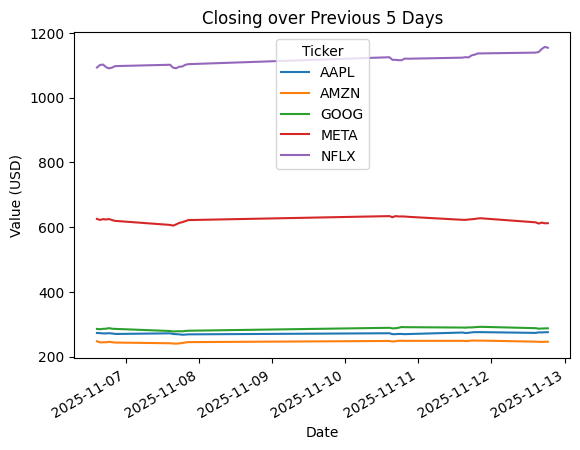

In [8]:
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = get_data['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')


plt.savefig('data/' + time_stamp)



### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three code lines were copied over:
- The first to pull the 5 day, hourly data for each of the stock.
- The second line to generate a timestamp of when ran.
- The final line to save the data into the `data` folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.

This results in the below code.

```python

import datetime as dt

import yfinance as yf

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

get_data.to_csv('data/' + time_stamp + '.csv')

```

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needs to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functions is to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can now be ran in the terminal by simply typing `./faang.py`.

# End